In [368]:
# This work aims to develop a reduced order model using POD LSTM method using snapshot CFD data. This works attempts to do this for cavity with thermal boundary conditions.
# The code here involves modifications of similar works referenced below to suit my problem.
# Similar work has been done by follwing researchers. 
# References to follow for the work
    # LSTM + POD : https://journals.aps.org/pre/abstract/10.1103/PhysRevE.100.053306  
    # ACE VS PCA : https://github.com/llabhishekll/blog-PCA-using-autoencoder
    # LSTM + POD : https://doi.org/10.48550/arXiv.1804.09269

                     


In [369]:
from __future__ import print_function, division
import math
import numpy as np

import matplotlib.pyplot as plt
import sys
import matplotlib.cm as cm
import scipy.interpolate


import random
random.seed(10)

import numpy as np
np.random.seed(10)

import tensorflow as tf
tf.random.set_seed(0)

import time as tm

import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import ticker
import matplotlib.animation as animation

%config Completer.use_jedi = False
%matplotlib inline
#%matplotlib notebook
#%matplotlib tk
import os
import pandas as pd
import matplotlib.pyplot as plt


import numpy as np
    #import copy
    #import pandas as pd
    #import matplotlib.dates as mdates
    #from matplotlib.dates import DateFormatter
    #import matplotlib.pyplot as plt
    #import mplcursors
    #import time as tm
    #import os

    #import datetime
    #import matplotlib.pyplot as plt
    #import matplotlib.dates as mdates
    #from matplotlib.dates import DateFormatter
    #import numpy as np


import sys 
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras


#import sklearn.decomposition
#import sklearn.preprocessing
#print(sklearn.__version__)

import matplotlib.pyplot as plt

#Optuna
#import optuna
#from optuna.integration import TFKerasPruningCallback
#from optuna.trial import TrialState
#from optuna.visualization import plot_intermediate_values
#from optuna.visualization import plot_optimization_history
#from optuna.visualization import plot_param_importances
#from optuna.visualization import plot_contour

# For LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import load_model

#from tensorflow.keras import *
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers.schedules import ExponentialDecay

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import joblib
import time

import sys


#plt.style.use('plot_style.txt')

font = {'family' : 'Times New Roman',
        'size'   : 16}    
plt.rc('font', **font)

#'weight' : 'bold'

import matplotlib as mpl
#mpl.rcParams['text.usetex'] = True
#mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']

import h5py
from tqdm import tqdm as tqdm


2.10.0


In [370]:
import pyvista
import pyvista as vtki
import numpy as np
import os
import pandas as pd
%config Completer.use_jedi = False



import vtk
from vtk.numpy_interface import dataset_adapter
from vtk.numpy_interface import algorithms as algs

import sys
from os.path import isdir, isfile, join
from os.path import expanduser
import numpy as np
import re

import json
import pickle

In [371]:
from pyvista import examples
filename = examples.download_cavity(load=False)

In [372]:
filename

'/home/mandart/.local/share/pyvista/examples/OpenFOAM.zip/OpenFOAM/cavity/case.foam'

In [373]:
# provide path name to where the files are stored.
path_filename='/media/mandart/D/Greenhouse_moved/turbulence_heatflux_3461_greenhouse/case.foam'
reader = pyvista.POpenFOAMReader(path_filename)
mesh = reader.read()
internal_mesh=mesh[0]
grid_modes8=internal_mesh 
grid8 = pyvista.UnstructuredGrid(internal_mesh)
grid8.save('Test_surface22.vtu')

In [377]:
internal_mesh['U']

pyvista_ndarray([[0., 0., 0.],
                 [0., 0., 0.],
                 [0., 0., 0.],
                 ...,
                 [0., 0., 0.],
                 [0., 0., 0.],
                 [0., 0., 0.]], dtype=float32)

In [378]:
print("Cell Data:")
print(internal_mesh.cell_data)

Cell Data:
pyvista DataSetAttributes
Association     : CELL
Active Scalars  : p
Active Vectors  : U
Active Texture  : None
Active Normals  : None
Contains arrays :
    T                       float32    (16704,)
    U                       float32    (16704, 3)           VECTORS
    alphat                  float32    (16704,)
    epsilon                 float32    (16704,)
    k                       float32    (16704,)
    nut                     float32    (16704,)
    p                       float32    (16704,)             SCALARS
    p_rgh                   float32    (16704,)


In [243]:
Utemp1=internal_mesh['U'].ravel(order='F')

In [559]:
print(f"Available Time Values: {reader.time_values}")
#reader.set_active_time_value(2.5)
#reader.cell_to_point_creation = True  # Need point data for streamlines
#mesh = reader.read()
#internal_mesh = mesh["internalMesh"]
#boundaries = mesh["boundary"]
count=0
for i in reader.time_values[:100]:
    #print(i)
    reader.set_active_time_value(i)
    mesh = reader.read()
    internal_mesh=mesh[0]
    Utemp1=list(internal_mesh['U'].ravel(order='F'))
    Ttemp1=list(internal_mesh['T'].ravel(order='F'))
    if count==0:                 
        listU=Utemp1
        listT=Ttemp1
    else:
        listU=np.vstack((listU,Utemp1))
        listT=np.vstack((listT,Ttemp1))
        
    
    #listT.hstack(b['temperature'])
    
    #a=pd.read_csv(path_filename+'/'+file1)
    #print(a.head())
    
    del Utemp1,Ttemp1,internal_mesh
    #print(count)
    #print(listU.shape)
    count=count+1
    
    


Available Time Values: [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 16.5, 17.0, 17.5, 18.0, 18.5, 19.0, 19.5, 20.0, 20.5, 21.0, 21.5, 22.0, 22.5, 23.0, 23.5, 24.0, 24.5, 25.0, 25.5, 26.0, 26.5, 27.0, 27.5, 28.0, 28.5, 29.0, 29.5, 30.0, 30.5, 31.0, 31.5, 32.0, 32.5, 33.0, 33.5, 34.0, 34.5, 35.0, 35.5, 36.0, 36.5, 37.0, 37.5, 38.0, 38.5, 39.0, 39.5, 40.0, 40.5, 41.0, 41.5, 42.0, 42.5, 43.0, 43.5, 44.0, 44.5, 45.0, 45.5, 46.0, 46.5, 47.0, 47.5, 48.0, 48.5, 49.0, 49.5, 50.0, 50.5, 51.0, 51.5, 52.0, 52.5, 53.0, 53.5, 54.0, 54.5, 55.0, 55.5, 56.0, 56.5, 57.0, 57.5, 58.0, 58.5, 59.0, 59.5, 60.0, 60.5, 61.0, 61.5, 62.0, 62.5, 63.0, 63.5, 64.0, 64.5, 65.0, 65.5, 66.0, 66.5, 67.0, 67.5, 68.0, 68.5, 69.0, 69.5, 70.0, 70.5, 71.0, 71.5, 72.0, 72.5, 73.0, 73.5, 74.0, 74.5, 75.0, 75.5, 76.0, 76.5, 77.0, 77.5, 78.0, 78.5, 79.0, 79.5, 80.0, 80.5, 81.0, 81.5, 82.0, 82.5, 

In [561]:
# for pcs, data in format of num_snapshot x num_spatial resolution

In [562]:
print(listU.shape)
listT.shape

(100, 50112)


(100, 16704)

In [564]:
# Data  shape in format needed by POD > ie num_of_grids x num_snapshots
U=listU.T
T=listT.T

In [565]:
###############################################################################
#POD Routines
###############################################################################         
def POD(u,R): #Basis Construction
    n,ns = u.shape
    U,S,Vh = LA.svd(u, full_matrices=False)
    Phi = U[:,:R]
    L = S**2
    #compute RIC (relative inportance index)
    RIC = sum(L[:R])/sum(L)*100   
    
    return Phi,L,RIC

def PODproj(u,Phi): #Projection
    a = np.dot(u.T,Phi)  # u = Phi * a.T
    return a

def PODrec(a,Phi): #Reconstruction    
    u = np.dot(Phi,a.T)    
    return u





In [566]:
# Do Singular value decomposition of data X to obtain basis functions , X=USV.T. Here data is velocity and temperature.
from numpy import linalg as LA
Phi_U,L_U,RIC_U=POD(U,10)

In [567]:
Phi_T.shape

(16704, 10)

In [568]:
Phi_T,L_T,RIC_T=POD(T,10)

In [569]:
for i in range(5): #nr , first 5 modes saved.
    #print(i)
    #use point data instead of cell data
    grid_modes8.cell_data["temp_mode_"+str(i)]=Phi_T[:,i]
    #grid_modes8.point_data["temperature_mode_"+str(i)]=wbasis[:,i]
    #grid_modes8.point_data["tke_mode_"+str(i)]=tbasis[:,i]
    vec=Phi_U[:,i].reshape(-1, 3, order='F')
    grid_modes8.cell_data.set_vectors(vec, "velocity_mode_"+str(i)) #["velocity_mode_"+str(i)]=sbasis[:,i]

0
1
2
3
4


In [570]:
 grid_modes8.cell_data_to_point_data()

UnstructuredGrid (0x7f906af46f30)
  N Cells:	16704
  N Points:	18750
  X Bounds:	0.000e+00, 4.800e-01
  Y Bounds:	0.000e+00, 4.800e-01
  Z Bounds:	0.000e+00, 5.800e-01
  N Arrays:	48

In [571]:
grid_modes8['velocity_mode_0']

pyvista_ndarray([[ 0.00177652, -0.00315413,  0.00038148],
                 [ 0.00086296, -0.00529867,  0.00062152],
                 [ 0.00035113, -0.00759388,  0.00073608],
                 ...,
                 [-0.00091862, -0.00350104,  0.00276876],
                 [-0.00075508, -0.00226463,  0.00288633],
                 [-0.00053482, -0.00125243,  0.00290216]], dtype=float32)

In [572]:
grid_modes8.save('Test_surface23.vtu')

In [573]:
pd.DataFrame(T).describe()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
count,16704.0,16704.000000,16704.000000,16704.000000,16704.000000,16704.000000,16704.000000,16704.000000,16704.000000,16704.000000,...,16704.000000,16704.000000,16704.000000,16704.000000,16704.000000,16704.000000,16704.000000,16704.000000,16704.000000,16704.000000
mean,296.0,296.005219,296.008209,296.009521,296.009705,296.008850,296.007721,296.007904,296.008789,296.010193,...,296.036652,296.036652,296.036652,296.036652,296.036652,296.036652,296.036652,296.036652,296.036652,296.036652
std,0.0,0.099311,0.118133,0.107776,0.067105,0.050811,0.046343,0.046749,0.047798,0.048270,...,0.053098,0.053101,0.053104,0.053106,0.053107,0.053109,0.053111,0.053112,0.053112,0.053114
min,296.0,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,...,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
25%,296.0,296.000000,296.000000,296.000000,296.000000,296.001007,296.002014,296.005005,296.007996,296.010986,...,296.045990,296.045990,296.045990,296.045990,296.045990,296.045990,296.045990,296.045990,296.045990,296.045990
50%,296.0,296.000000,296.000000,296.000000,296.001007,296.003998,296.009003,296.013000,296.016998,296.019989,...,296.057007,296.057007,296.057007,296.057007,296.057007,296.057007,296.057007,296.057007,296.057007,296.057007
75%,296.0,296.000000,296.000000,296.001007,296.003998,296.014008,296.023987,296.028015,296.028015,296.028992,...,296.066010,296.066010,296.066010,296.066010,296.066010,296.066010,296.066010,296.066010,296.066010,296.066010
max,296.0,299.570007,300.382996,300.334991,298.005005,297.519012,297.454987,297.423004,297.407990,297.403992,...,297.451996,297.453003,297.453003,297.453003,297.453003,297.453003,297.453003,297.453003,297.453003,297.453003


In [574]:
# Cumulative Energy with Modes and plot below 
cumsum_T=np.cumsum(L_T[:10])/sum(L_T)*100 
Tcumsum=np.around(cumsum_T, 6) 

In [575]:
np.cumsum(L_U[:10])/sum(L_U)*100

array([99.55108 , 99.84042 , 99.93816 , 99.96795 , 99.99148 , 99.997635,
       99.99925 , 99.99975 , 99.99991 , 99.99998 ], dtype=float32)

In [576]:
# create plots folder
fn="./Plots1"
if os.path.isdir(fn):
    print('Plots folder already exists')
else: 
    print('Creating plots folder')
    os.makedirs(fn)

Plots folder already exists


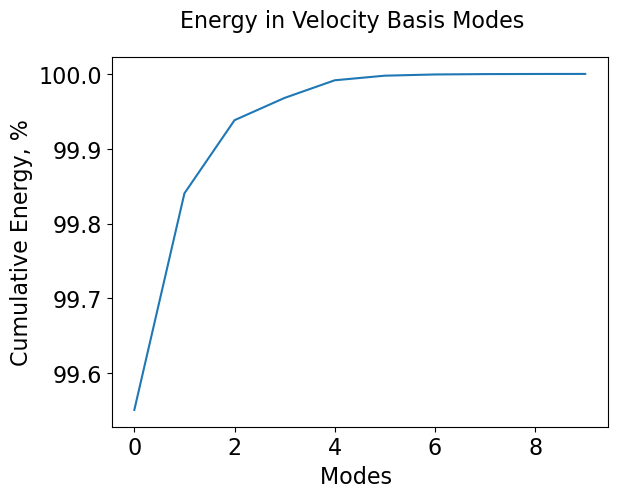

In [577]:
fig = plt.figure()
plt.plot(np.cumsum(L_U[:10])/sum(L_U)*100)
fig.suptitle('Energy in Velocity Basis Modes', fontsize=16)
plt.xlabel('Modes ', fontsize=16)
plt.ylabel('Cumulative Energy, %', fontsize=16)
fig.savefig(fn+'/Cumulative_Energy_Velocity.png')
fig.savefig(fn+'/Cumulative_Energy_Velocity.pdf')




In [578]:
Tcumsum

array([100., 100., 100., 100., 100., 100., 100., 100., 100., 100.],
      dtype=float32)

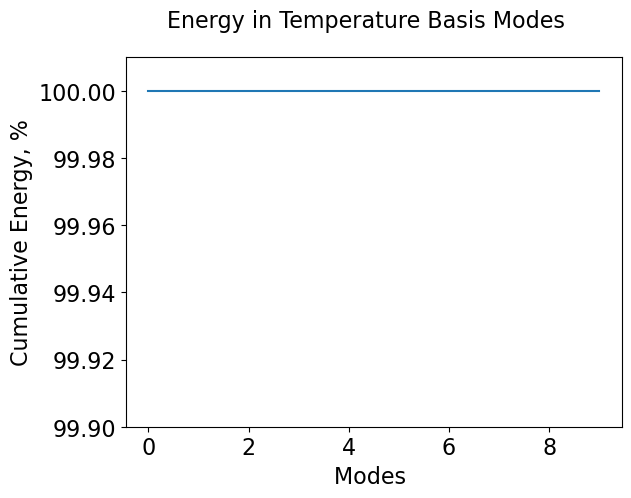

In [579]:
fig = plt.figure()
plt.plot(Tcumsum)
fig.suptitle('Energy in Temperature Basis Modes', fontsize=16)
plt.xlabel('Modes ', fontsize=16)
plt.ylabel('Cumulative Energy, %', fontsize=16)
plt.ylim((99.9,100.01))
fig.savefig(fn+'Cumulative_Energy_Temperature.png')
fig.savefig(fn+'Cumulative_Energy_Temperature.pdf')

In [580]:
#Obtain coefficients by projecting the original dataset into Basis function coordinates 
a_true_4_U=PODproj(U,Phi_U)
a_true_4_T=PODproj(T,Phi_T)


In [581]:
pd.DataFrame(Phi_T).describe()

,0,1,2,3,4,5,6,7,8,9
count,16704.000000,1.670400e+04,1.670400e+04,1.670400e+04,1.670400e+04,1.670400e+04,1.670400e+04,1.670400e+04,1.670400e+04,1.670400e+04
mean,-0.007737,4.762485e-07,5.738848e-07,-8.867437e-07,2.928005e-07,-7.138894e-08,5.764421e-08,-1.556810e-08,5.472301e-09,1.208199e-09
std,0.000001,7.737509e-03,7.737532e-03,7.737532e-03,7.737536e-03,7.737529e-03,7.737543e-03,7.737515e-03,7.737541e-03,7.737547e-03
min,-0.007775,-2.719199e-01,-1.686183e-01,-4.020973e-02,-1.485688e-01,-1.537159e-01,-7.144336e-02,-2.294453e-01,-5.517882e-02,-8.696488e-02
25%,-0.007737,-8.480517e-04,8.691736e-04,-3.320438e-03,-9.100581e-04,-3.135786e-03,-3.663609e-03,-1.406877e-03,-3.988354e-03,-4.345408e-03
50%,-0.007737,1.199049e-04,1.289207e-03,-4.790676e-04,1.251651e-03,-6.070179e-04,6.340760e-04,-8.749797e-06,8.343465e-04,-8.910962e-04
75%,-0.007737,8.711066e-04,1.591010e-03,7.861071e-04,2.429576e-03,2.159437e-03,4.193727e-03,1.498394e-03,3.552244e-03,2.584647e-03
max,-0.007736,2.534362e-02,1.157002e-01,1.366765e-01,8.554023e-02,1.578340e-01,9.511960e-02,2.488155e-01,5.994279e-02,4.988314e-02


In [582]:
a_true_4_U.shape #number_snapshots x num_modes temporal coefficients. 

(100, 10)

In [583]:
Phi_U.shape

(50112, 10)

In [584]:
print(os.getcwd())

/media/mandart/D/NorthWind-FME/yaw_data/yaw0


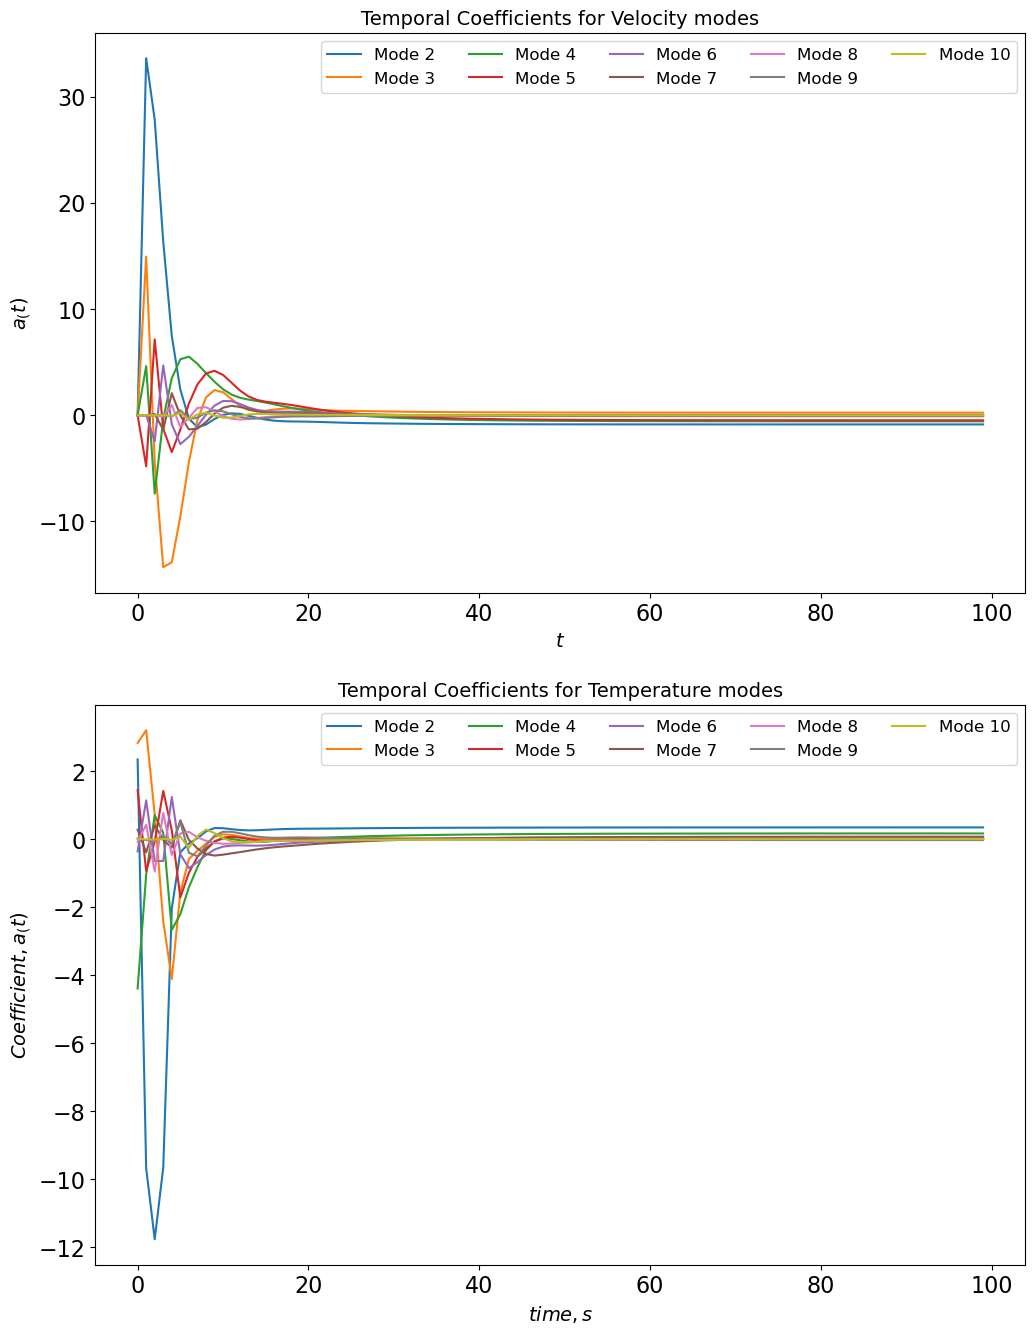

In [585]:

fig, ax = plt.subplots(nrows=2,ncols=1, figsize=(12,16),facecolor=(1, 1, 1))
ax = ax.flat
ax[0].set_xlabel(r'$t$',fontsize=14)
ax[0].set_ylabel(r'$a_(t)$',fontsize=14)
ax[0].set_title(r'Temporal Coefficients for Velocity modes',fontsize=14)
ax[1].set_title(r'Temporal Coefficients for Temperature modes',fontsize=14)
ax[1].set_xlabel(r'$time,s$',fontsize=14)
ax[1].set_ylabel(r'$Coefficient, a_(t)$',fontsize=14)
for k in range(1, R[1],1): #steps by 1
    ax[0].plot(a_true_4_U.T[k,:], label=r'Mode %1.0f' %(k+1)) # Transpose is taken.
    ax[1].plot(a_true_4_T.T[k,:], label=r'Mode %1.0f' %(k+1))  # Transpose is taken.
    #ax[k].plot(t,aUROM[:,k,p], label=r'UROM',linestyle='-.', color = 'C1')
    #ax[k].plot(t,aGP16[:,k,p], label=r'GROM('+str(Q)+')',linestyle='--', color = 'C2')
    #ax[k].plot(t,aGP4[:,k,p], label=r'GROM('+str(R)+')',linestyle=':', color = 'C3')
    #ax[k].plot(t,aNIROM[:,k,p], label=r'NIROM',linestyle=':', color = 'C4')
    
    #ax[0].set_ylabel(r'$a_{'+str(k+1) +'}(t)$',fontsize=14)
    #ax[0].set_ylabel(r'$a$',fontsize=14)

ax[0].legend(loc='best' ,ncol=5,fontsize=12)  #
ax[1].legend(loc='best' ,ncol=5,fontsize=12)
#fig.subplots_adjust(bottom=0.15,hspace=0.7, wspace=0.35)
plt.savefig('./Plots1/2Dtempt_a_Re_mode2_included' +  \
            '_R=' + str(10) +  '.png',\
            dpi = 500, bbox_inches = 'tight')

plt.savefig('./Plots1/2Dtempt_a_Re_mode2_included' +  \
            '_R=' + str(10) +  '.pdf',\
            dpi = 500, bbox_inches = 'tight')

In [586]:
#whos

In [587]:

#load all files in order 1300
#Remove is null
#check Randomly if it looks oky

#Arrange the files in the dataset required. 1500

#Input POD and store modes and temporal coefficeints. (0900-1100 at night)

# Arrange temporal coefficients in the format required by LSTM. (tomorrow)

# Do long short term memory (LSTM) propagation. (tomorrow)

# Send results of reconstruction to Arijit.



In [634]:
a_true_4_T.shape  #num_snapshot x num_modes

(100, 10)

In [635]:
Phi_T.shape


(16704, 10)

In [495]:
# Variables
# Spatial Modes
# Temporal modes

#split the obtained temporal coefficients data from POD  into training and testing data. 
#Scale the training data and save the scaling factor.
#Convert the training data into LSTM format 
# LSTM training to learn the pattern of temporal dynamics with num_features equivalent to num_of modes and its accompanying temporal coefficients 
# Testing : Scale the testing data and apply LSTM on it to obtain temporal coefficients.
#Convert back to original format and unscale it.
# Reconstruct the flow field using tested temporal coefficient and check with original flow field. 



#split training and testing dataset
def split_timeseries(df,nfrac=0.8):
    nlen=df.shape[0]
    nrow=int(nfrac*nlen)
    train_dataset = df.iloc[:nrow, :]
    test_dataset = df.iloc[nrow:,:]
    return train_dataset,test_dataset

train_dataset_ts,test_dataset_ts=split_timeseries(pd.DataFrame(a_true_4_U))

In [693]:
#Select number of modes
a_true_4_T_old=a_true_4_T
Phi_T_old=Phi_T
nr=3
a_true_4_T=a_true_4_T[:,:nr]
Phi_T=Phi_T[:,:nr]

In [695]:
a_true_4_T.shape

(100, 3)

In [669]:
#Do reconstruction using POD basis and modes
Trecons=PODrec(a_true_4_T,Phi_T) #shape Grid_size x 10 x 10 x 350 (a.T)
 
# So to obtain reconstruction at a specific time t : obtain a at time(t) corresponding to all 10 modes 
# note the time index of lstm generated at test and obtain the reconstruction

In [ ]:
#Do scaling
sc = MinMaxScaler(feature_range=(-1,1))
training_set_scaled = sc.fit_transform(a_true_4_T)
a_true_4_T = training_set_scaled

In [670]:
Trecons.shape

(16704, 100)

In [671]:
Phi_T.shape

(16704, 3)

In [672]:
errorT=Trecons-listT.T

In [673]:
errorT.shape

(16704, 100)

grid_modes8.clear_data()

In [674]:
grid_modes8

UnstructuredGrid (0x7f910431de50)
  N Cells:	16704
  N Points:	18750
  X Bounds:	0.000e+00, 4.800e-01
  Y Bounds:	0.000e+00, 4.800e-01
  Z Bounds:	0.000e+00, 5.800e-01
  N Arrays:	15

In [675]:
#reshape and save
for i in np.arange(0,errorT.shape[1]-3,20):
    print(i)
    grid_modes8.cell_data["T_error"+str(i)]=errorT[:,i]
    grid_modes8.cell_data["PODreconstructed_temp"+str(i)]=Trecons[:,i]
    grid_modes8.cell_data["original_temp"+str(i)]=listT.T[:,i]
grid_modes8.cell_data_to_point_data()    

0
20
40
60
80


UnstructuredGrid (0x7f9059abdf30)
  N Cells:	16704
  N Points:	18750
  X Bounds:	0.000e+00, 4.800e-01
  Y Bounds:	0.000e+00, 4.800e-01
  Z Bounds:	0.000e+00, 5.800e-01
  N Arrays:	15

In [676]:
grid_modes8.save('temperature_test.vtu')

type(a_true_4_U[3])
for i in range(lookback-1,m-1):
    print(i)

In [696]:
def create_training_data_lstm(training_set, m, n, lookback):
    ytrain = [training_set[i+1] for i in range(lookback-1,m-1)] #m-lookback from 2 to 29. Training set from 3 to 30 (included). List of arrays, each of size nr x 1.
    ytrain = np.array(ytrain) #m-lookback x nr starting from 3.
    xtrain = np.zeros((m-lookback,lookback,n))
    for i in range(m-lookback):
        a = training_set[i] #1D starts from 0. dimension : nr
        for j in range(1,lookback): 
            a = np.vstack((a,training_set[i+j])) #At end of loop, a stacked recurvesively along rows (vertically) i.e. starting from "a from i",and, a from i+1, and , a from i+2,..., a from i+lb-1 stacked vertically. In this case, a is 
        xtrain[i] = a #looxback x nr

    return xtrain, ytrain


lookback=3
m,n=a_true_4_T.shape
data_sc, labels_sc = create_training_data_lstm(a_true_4_T, m, n, lookback)

In [697]:
print("input lstm training database shape: ", data_sc.shape , " i.e. samples x timesteps x input_features" )
print("output lstm training database  shape: samples x output_feature", labels_sc.shape, " i.e. samples x timesteps x input_features" )

input lstm training database shape:  (97, 3, 3)  i.e. samples x timesteps x input_features
output lstm training database  shape: samples x output_feature (97, 3)  i.e. samples x timesteps x input_features


In [698]:
#Need to do scaling of variables. Since one variable is there, and results are coming good, so left it. For temperature variable below, scaling is done. See.

In [699]:
#IMPORTANT : Note : with shuffle False - LSTM results are not good as test dataset is outside the range. 
# Shuffle false is for splitting a time series dataset. Shuffle true ensures that test dataset is within training dataset.

from sklearn.model_selection import train_test_split
indices = np.arange(data_sc.shape[0])
xtrain, xvalid, ytrain, yvalid,indices_train, indices_test = train_test_split(data_sc, labels_sc, indices,test_size=0.2 , shuffle=True)


In [700]:
print(xtrain.shape,xvalid.shape,ytrain.shape,yvalid.shape)
print(data_sc.shape)

(77, 3, 3) (20, 3, 3) (77, 3) (20, 3)
(97, 3, 3)


In [701]:
print(a_true_4_T.shape, m, n, lookback)

(100, 3) 100 3 3


#### Below : check timeindex and its use in comparing original data "a_true_4_u" with LSTM predictions ytest/ytrain - as for training LSTM , the original database was converted. 

In [702]:
data_sc[indices_train[0]][:,0] #first 3 a_t belonging to mode number 0 in lstm training.

array([-0.93554688, -0.94238281, -0.94726562])

In [703]:
#create timeindex
timeindex_train_label=indices_train+lookback #checklabel
print(timeindex_train_label)

[47  4 20 92 46 70 96 53 76  7 35 78 85  3 59 13 16 67 64 69 33 87 55 40
 65 98 82 88 83 15 66  8 37 49 34 50 36 80 25 52 41 10 12 17 94 28 81 91
 22 93 24 57 27 26 68 61 79 51  6 23 19  9 75 58 84 31 77 39 72 54 74 44
 18  5 71 21 99]


#print(a_true_4_U[timeindex_train_label,0]) #checking that timeindex (index + lookback) in original database is equal to predicted values in ytrain.
#print(ytrain[:,0])
if np.testing.assert_allclose(a_true_4_U[timeindex_train_label,0], ytrain[:,0]):
     print("Matched")
else:
     print("Not Matched")
print(np.testing.assert_allclose(a_true_4_U[timeindex_train_label,0], ytrain[:,0],rtol=1e-5, atol=0))

In [704]:
np.array_equal(a_true_4_T[timeindex_train_label,:], ytrain[:,:])

True

In [705]:
timeindex_test_label=indices_test+lookback #checklabel
np.array_equal(a_true_4_T[timeindex_test_label,:], yvalid[:,:]) #so what ever has been predicted by lstm for input of xtest has to be compared with this.

True

In [611]:
#Optuna based optimization
best_booster = None
gbm = None

#def callback(study, trial):
#    global best_booster
#    if study.best_trial == trial:
#        best_booster = gbm
            
def objective(trial):# For LSTM model
    global gbm
    # ...

            
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense
    from tensorflow.keras.layers import LSTM
    from tensorflow.keras.layers import Dropout
    from tensorflow.keras.models import load_model

        # For LSTM model
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense
    from tensorflow.keras.layers import LSTM
    from tensorflow.keras.layers import Dropout
    from tensorflow.keras.models import load_model
    
    # Clear clutter from previous session graphs.
    keras.backend.clear_session()
    
    Q=xtrain.shape[1] # -1 was used because featuer of Reynolds number was added.
    
    filenamelstm='LSTM Models1'
    import os
    if os.path.isdir("./"+filenamelstm):
        print('LSTM models folder already exists')
    else: 
        print('Creating LSTM models folder')
        os.makedirs("./"+filenamelstm)
    # Removing old models
    model_name = 'LSTM Models1/LSTM-Corrector.h5'
    if os.path.isfile(model_name):
        os.remove(model_name)

    ## Shuffling data    
    #perm = np.random.permutation(m)
    #xtrain = xtrain[perm,:,:]
    #ytrain = ytrain[perm,:]
    lstmtype=2
    
    lookback=3

    epochs=200
    
    batch_size=30
    
    #with strategy.scope():
    
    #val_loss,model3=NIROM_LSTM_training_with_optuna(trial,filenamelstm,model_name,lstmtype,lookback,Q)
    model3 = create_model(trial)
    #Criteria for early stoping, model saving and reducing learning rate on the fly.
    es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
    mc = keras.callbacks.ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
    reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=5, min_lr=0.001)
    callbacks=[TFKerasPruningCallback(trial, "val_loss"),es,mc,reduce_lr]
    print(epochs,batch_size,'epochs')   
    # run the model
    history = model3.fit(xtrain, ytrain, epochs=epochs, batch_size=batch_size,validation_split=0.2,\
                         callbacks=[TFKerasPruningCallback(trial, "val_loss")]) #inculde ,es,mc,reduce_lr

    # evaluate the model
    scores = model3.evaluate(xtrain, ytrain, verbose=0)
    print("%s: %.2f%%" % (model3.metrics_names[1], scores[1]*100))

    loss = history.history['loss']
    val_loss = history.history['val_loss']
        
    return val_loss[-1]


In [612]:
def show_result(study):

    pruned_trials = study.get_trials(deepcopy=False, states=[TrialState.PRUNED])
    complete_trials = study.get_trials(deepcopy=False, states=[TrialState.COMPLETE])

    print("Study statistics: ")
    print("  Number of finished trials: ", len(study.trials))
    print("  Number of pruned trials: ", len(pruned_trials))
    print("  Number of complete trials: ", len(complete_trials))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: ", trial.value)

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

In [660]:
print(xtrain.shape[1:])

(3, 4)


In [661]:
def create_model(trial):
    # We optimize the numbers of layers, their units and weight decay parameter.

    n_layers = trial.suggest_int("n_layers", 1, 3)
    #weight_decay = trial.suggest_float("weight_decay",  2e-6, 1e-1, log=True)
    #lr = trial.suggest_float("lr", 0.05, 0.06, log=True)
      
    #momentum = trial.suggest_float("momentum", 0.8, 1.0)
    model = Sequential()

    for i in range(n_layers):
        
        dropout = trial.suggest_float("dropout_l{}".format(i), 0.21, 0.42)

        num_hidden = trial.suggest_int("n_units_l{}".format(i), 20, 150, log=True)
        
        if i < max(range(n_layers)):
            rs = True
        else:
            rs = False # final hidden 

        Q=xtrain.shape[2]

        model.add(LSTM(num_hidden, input_shape=(xtrain.shape[1:]), return_sequences=rs))

        model.add(Dropout(rate=dropout)) 

        #model.add(BatchNormalization())
        
        #model.add(LSTM(num_hidden))

        #model.add(Dropout(rate=dropout)) 

        #model.add(BatchNormalization())
        
        #model.add(Dense(num_hidden, activation='relu'))

        #model.add(Dropout(rate=dropout)) 
        
#        model.add(tf.keras.layers.Flatten())
#        model.add(Dense(
#                num_hidden,
#                activation="relu",
#                kernel_regularizer=tf.keras.regularizers.l2(weight_decay)
#            )
#        )
# Compile model for classification , kernel_regularizer=tf.keras.regularizers.l2(weight_decay)
    model.add(Dense(Q, activation='linear')) #, kernel_regularizer=tf.keras.regularizers.l2(weight_decay)
        #tf.keras.layers.Dense(2, kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))

    # Compile model for classification
    #model.compile(
    #    optimizer=tf.keras.optimizers.SGD(lr=lr, momentum=momentum, nesterov=True),
    #    loss="sparse_categorical_crossentropy",
    #    metrics=["accuracy"],
    #)
    
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

    return model


In [ ]:
class CustomSaver(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if epoch == 2:  # or save after some epoch, each k-th epoch etc.
            self.model.save("model_{}.hd5".format(epoch))

In [662]:
#atrain is original field stacked
#errortrain is error field stacked
def NIROM_LSTM_trainingnooptuna(filenameLSTM,model_name,lstmtype,lookback,Q,optuna1='false'): 
    # (nc,ns,Q,Re,aTrain,errortrain,lookback,epochs,batch_size,lstmtype):
        
    # Parameters to vary
    activation =  "relu"
    n_neurons=60
    dropout = 0
            
    
    epochs=200
    
    batch_size=30
    
    
    if lstmtype==2: 
        model3 = Sequential()              
        model3.add(LSTM(n_neurons, input_shape=(lookback,Q), return_sequences=True, activation=activation)) # 
        model3.add(LSTM(n_neurons,  return_sequences=True, activation=activation,dropout=dropout))
        model3.add(LSTM(n_neurons,  activation=activation,dropout=dropout))
        model3.add(Dense(Q,activation='linear')) #gives Q output values 
    elif lstmtype==5: #Stateful LSTM (Avoid)
        model3 = Sequential()
        model3.add(LSTM(n_neurons, input_shape=(lookback,Q), return_sequences=True, activation=activation)) # 
        model3.add(LSTM(n_neurons,  return_sequences=True, activation=activation,dropout=dropout))
        model3.add(LSTM(n_neurons,  activation=activation,dropout=dropout))
        model3.add(Dense(Q,activation='linear'))        #https://stackoverflow.com/questions/64309194/invalidargumenterror-specified-a-list-with-shape-60-9-from-a-tensor-with-shap
    else: #SimpleLSTM
        model3 = Sequential()
        model3.add(LSTM(n_neurons, input_shape=(lookback,Q), return_sequences=False, activation='tanh')) # 
        model3.add(Dense(Q))

    # compile model
    model3.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
    
    #Criteria for early stoping, model saving and reducing learning rate on the fly.
    es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
    mc = keras.callbacks.ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
    reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=5, min_lr=0.001)
    callbacks=[es,mc,reduce_lr]
    print(epochs,batch_size,'epochs')   
    # run the model
    history = model3.fit(xtrain, ytrain, epochs=epochs, batch_size=batch_size,validation_split=0.2) #callbacks=[es,mc,reduce_lr]

    # evaluate the model
    scores = model3.evaluate(xtrain, ytrain, verbose=0)
    print("%s: %.2f%%" % (model3.metrics_names[1], scores[1]*100))

    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    
    
    

    # Save the scales
  #  filename = 'LSTM Models1/NIROM_input_scaler.save'
  #  joblib.dump(scalerIn3,filename) 
  #  filename = 'LSTM Models1/NIROM_output_scaler.save'
  #  joblib.dump(scalerOut3,filename) 
  #  print ("VALIDATION LOSS", val_loss[-1])
    
    return loss,val_loss,model3


In [706]:
# For LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import load_model
#Optuna
import optuna
from optuna.integration import TFKerasPruningCallback
from optuna.trial import TrialState
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_contour

# For LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import load_model

#from tensorflow.keras import *
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers.schedules import ExponentialDecay


study = optuna.create_study(direction="minimize", sampler=optuna.samplers.TPESampler(), pruner=optuna.pruners.HyperbandPruner())
study.optimize(objective, n_trials=10)
pruned_trials = study.get_trials(deepcopy=False, states=[TrialState.PRUNED])
complete_trials = study.get_trials(deepcopy=False, states=[TrialState.COMPLETE])
show_result(study)


[I 2023-02-15 12:38:14,367] A new study created in memory with name: no-name-d00bb949-99e2-4c19-a1f6-5e1ec7106aae


LSTM models folder already exists
200 30 epochs
Epoch 1/200
3/3 [==============================] - 5s 561ms/step - loss: 0.4135 - mse: 0.4135 - val_loss: 0.3709 - val_mse: 0.3709
Epoch 2/200
3/3 [==============================] - 0s 60ms/step - loss: 0.3565 - mse: 0.3565 - val_loss: 0.3199 - val_mse: 0.3199
Epoch 3/200
3/3 [==============================] - 0s 60ms/step - loss: 0.3123 - mse: 0.3123 - val_loss: 0.2718 - val_mse: 0.2718
Epoch 4/200
3/3 [==============================] - 0s 60ms/step - loss: 0.2611 - mse: 0.2611 - val_loss: 0.2230 - val_mse: 0.2230
Epoch 5/200
3/3 [==============================] - 0s 55ms/step - loss: 0.2152 - mse: 0.2152 - val_loss: 0.1744 - val_mse: 0.1744
Epoch 6/200
3/3 [==============================] - 0s 48ms/step - loss: 0.1819 - mse: 0.1819 - val_loss: 0.1241 - val_mse: 0.1241
Epoch 7/200
3/3 [==============================] - 0s 44ms/step - loss: 0.1267 - mse: 0.1267 - val_loss: 0.0774 - val_mse: 0.0774
Epoch 8/200
3/3 [========================

[I 2023-02-15 12:38:49,335] Trial 0 finished with value: 0.0020496791694313288 and parameters: {'n_layers': 2, 'dropout_l0': 0.3512742975638823, 'n_units_l0': 85, 'dropout_l1': 0.36656347223133146, 'n_units_l1': 43}. Best is trial 0 with value: 0.0020496791694313288.


mse: 0.26%
LSTM models folder already exists
200 30 epochs
Epoch 1/200
3/3 [==============================] - 6s 614ms/step - loss: 0.4069 - mse: 0.4069 - val_loss: 0.3883 - val_mse: 0.3883
Epoch 2/200
3/3 [==============================] - 0s 77ms/step - loss: 0.3774 - mse: 0.3774 - val_loss: 0.3581 - val_mse: 0.3581
Epoch 3/200
3/3 [==============================] - 0s 80ms/step - loss: 0.3486 - mse: 0.3486 - val_loss: 0.3248 - val_mse: 0.3248
Epoch 4/200
3/3 [==============================] - 0s 59ms/step - loss: 0.3177 - mse: 0.3177 - val_loss: 0.2855 - val_mse: 0.2855
Epoch 5/200
3/3 [==============================] - 0s 74ms/step - loss: 0.2779 - mse: 0.2779 - val_loss: 0.2391 - val_mse: 0.2391
Epoch 6/200
3/3 [==============================] - 0s 73ms/step - loss: 0.2315 - mse: 0.2315 - val_loss: 0.1817 - val_mse: 0.1817
Epoch 7/200
3/3 [==============================] - 0s 57ms/step - loss: 0.1743 - mse: 0.1743 - val_loss: 0.1172 - val_mse: 0.1172
Epoch 8/200
3/3 [=============

[I 2023-02-15 12:39:26,307] Trial 1 finished with value: 0.004050436895340681 and parameters: {'n_layers': 3, 'dropout_l0': 0.26616750956999546, 'n_units_l0': 39, 'dropout_l1': 0.3126133414147822, 'n_units_l1': 44, 'dropout_l2': 0.2214919537918907, 'n_units_l2': 67}. Best is trial 0 with value: 0.0020496791694313288.



LSTM models folder already exists
200 30 epochs
Epoch 1/200
3/3 [==============================] - 4s 437ms/step - loss: 0.4256 - mse: 0.4256 - val_loss: 0.4092 - val_mse: 0.4092
Epoch 2/200
3/3 [==============================] - 0s 51ms/step - loss: 0.4004 - mse: 0.4004 - val_loss: 0.3826 - val_mse: 0.3826
Epoch 3/200
3/3 [==============================] - 0s 36ms/step - loss: 0.3720 - mse: 0.3720 - val_loss: 0.3581 - val_mse: 0.3581
Epoch 4/200
3/3 [==============================] - 0s 35ms/step - loss: 0.3522 - mse: 0.3522 - val_loss: 0.3340 - val_mse: 0.3340
Epoch 5/200
3/3 [==============================] - 0s 41ms/step - loss: 0.3298 - mse: 0.3298 - val_loss: 0.3102 - val_mse: 0.3102
Epoch 6/200
3/3 [==============================] - 0s 41ms/step - loss: 0.3054 - mse: 0.3054 - val_loss: 0.2844 - val_mse: 0.2844
Epoch 7/200
3/3 [==============================] - 0s 35ms/step - loss: 0.2779 - mse: 0.2779 - val_loss: 0.2569 - val_mse: 0.2569
Epoch 8/200
3/3 [=======================

[I 2023-02-15 12:40:10,204] Trial 2 finished with value: 0.0034121316857635975 and parameters: {'n_layers': 2, 'dropout_l0': 0.23097108731207622, 'n_units_l0': 25, 'dropout_l1': 0.277737875392245, 'n_units_l1': 45}. Best is trial 0 with value: 0.0020496791694313288.


mse: 0.41%
LSTM models folder already exists
200 30 epochs
Epoch 1/200
3/3 [==============================] - 6s 630ms/step - loss: 0.4134 - mse: 0.4134 - val_loss: 0.3912 - val_mse: 0.3912
Epoch 2/200
3/3 [==============================] - 0s 67ms/step - loss: 0.3819 - mse: 0.3819 - val_loss: 0.3560 - val_mse: 0.3560
Epoch 3/200
3/3 [==============================] - 0s 47ms/step - loss: 0.3458 - mse: 0.3458 - val_loss: 0.3136 - val_mse: 0.3136
Epoch 4/200
3/3 [==============================] - 0s 50ms/step - loss: 0.3005 - mse: 0.3005 - val_loss: 0.2594 - val_mse: 0.2594
Epoch 5/200
3/3 [==============================] - 0s 47ms/step - loss: 0.2525 - mse: 0.2525 - val_loss: 0.1928 - val_mse: 0.1928
Epoch 6/200
3/3 [==============================] - 0s 43ms/step - loss: 0.1874 - mse: 0.1874 - val_loss: 0.1135 - val_mse: 0.1135
Epoch 7/200
3/3 [==============================] - 0s 46ms/step - loss: 0.1040 - mse: 0.1040 - val_loss: 0.0430 - val_mse: 0.0430
Epoch 8/200
3/3 [=============

[I 2023-02-15 12:40:47,080] Trial 3 finished with value: 0.0024008697364479303 and parameters: {'n_layers': 3, 'dropout_l0': 0.4197076144269912, 'n_units_l0': 50, 'dropout_l1': 0.396536785504316, 'n_units_l1': 69, 'dropout_l2': 0.3140689274501347, 'n_units_l2': 113}. Best is trial 0 with value: 0.0020496791694313288.


LSTM models folder already exists
200 30 epochs
Epoch 1/200
3/3 [==============================] - 2s 298ms/step - loss: 0.3768 - mse: 0.3768 - val_loss: 0.3054 - val_mse: 0.3054
Epoch 2/200
3/3 [==============================] - 0s 53ms/step - loss: 0.2901 - mse: 0.2901 - val_loss: 0.2307 - val_mse: 0.2307
Epoch 3/200
3/3 [==============================] - 0s 39ms/step - loss: 0.2189 - mse: 0.2189 - val_loss: 0.1668 - val_mse: 0.1668
Epoch 4/200
3/3 [==============================] - 0s 51ms/step - loss: 0.1583 - mse: 0.1583 - val_loss: 0.1108 - val_mse: 0.1108
Epoch 5/200
3/3 [==============================] - 0s 56ms/step - loss: 0.1023 - mse: 0.1023 - val_loss: 0.0667 - val_mse: 0.0667
Epoch 6/200
3/3 [==============================] - 0s 40ms/step - loss: 0.0630 - mse: 0.0630 - val_loss: 0.0352 - val_mse: 0.0352
Epoch 7/200
3/3 [==============================] - 0s 51ms/step - loss: 0.0347 - mse: 0.0347 - val_loss: 0.0222 - val_mse: 0.0222
Epoch 8/200
3/3 [========================

[I 2023-02-15 12:40:51,847] Trial 4 pruned. Trial was pruned at epoch 9.


LSTM models folder already exists
200 30 epochs
Epoch 1/200
3/3 [==============================] - 6s 626ms/step - loss: 0.4077 - mse: 0.4077 - val_loss: 0.3726 - val_mse: 0.3726
Epoch 2/200
1/3 [=========>....................] - ETA: 0s - loss: 0.3696 - mse: 0.3696

[I 2023-02-15 12:40:59,358] Trial 5 pruned. Trial was pruned at epoch 1.


LSTM models folder already exists
200 30 epochs
Epoch 1/200
3/3 [==============================] - 6s 723ms/step - loss: 0.4201 - mse: 0.4201 - val_loss: 0.4056 - val_mse: 0.4056
Epoch 2/200
3/3 [==============================] - ETA: 0s - loss: 0.3974 - mse: 0.3974

[I 2023-02-15 12:41:08,635] Trial 6 pruned. Trial was pruned at epoch 1.


LSTM models folder already exists
200 30 epochs
Epoch 1/200
3/3 [==============================] - 5s 535ms/step - loss: 0.4071 - mse: 0.4071 - val_loss: 0.3557 - val_mse: 0.3557
Epoch 2/200
3/3 [==============================] - 0s 60ms/step - loss: 0.3422 - mse: 0.3422 - val_loss: 0.2936 - val_mse: 0.2936
Epoch 3/200
3/3 [==============================] - 0s 57ms/step - loss: 0.2819 - mse: 0.2819 - val_loss: 0.2304 - val_mse: 0.2304
Epoch 4/200
1/3 [=========>....................] - ETA: 0s - loss: 0.2194 - mse: 0.2194

[I 2023-02-15 12:41:16,562] Trial 7 pruned. Trial was pruned at epoch 3.


LSTM models folder already exists
200 30 epochs
Epoch 1/200
1/3 [=========>....................] - ETA: 9s - loss: 0.4116 - mse: 0.4116WARNING:tensorflow:5 out of the last 19 calls to <function Model.make_test_function.<locals>.test_function at 0x7f90493537a0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


3/3 [==============================] - 6s 637ms/step - loss: 0.4060 - mse: 0.4060 - val_loss: 0.3723 - val_mse: 0.3723
Epoch 2/200
3/3 [==============================] - 0s 52ms/step - loss: 0.3596 - mse: 0.3596 - val_loss: 0.3226 - val_mse: 0.3226
Epoch 3/200
3/3 [==============================] - 0s 50ms/step - loss: 0.3111 - mse: 0.3111 - val_loss: 0.2629 - val_mse: 0.2629
Epoch 4/200
3/3 [==============================] - 0s 71ms/step - loss: 0.2526 - mse: 0.2526 - val_loss: 0.1879 - val_mse: 0.1879
Epoch 5/200
3/3 [==============================] - 0s 69ms/step - loss: 0.1736 - mse: 0.1736 - val_loss: 0.1028 - val_mse: 0.1028
Epoch 6/200
3/3 [==============================] - 0s 62ms/step - loss: 0.1004 - mse: 0.1004 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 7/200
3/3 [==============================] - 0s 47ms/step - loss: 0.0549 - mse: 0.0549 - val_loss: 0.0490 - val_mse: 0.0490
Epoch 8/200
3/3 [==============================] - 0s 43ms/step - loss: 0.0954 - mse: 0.0954 - val_lo

[I 2023-02-15 12:41:38,874] Trial 8 pruned. Trial was pruned at epoch 81.


LSTM models folder already exists
200 30 epochs
Epoch 1/200
3/3 [==============================] - 4s 466ms/step - loss: 0.4274 - mse: 0.4274 - val_loss: 0.3868 - val_mse: 0.3868
Epoch 2/200
1/3 [=========>....................] - ETA: 0s - loss: 0.3877 - mse: 0.3877

[I 2023-02-15 12:41:48,452] Trial 9 pruned. Trial was pruned at epoch 1.


Study statistics: 
  Number of finished trials:  10
  Number of pruned trials:  6
  Number of complete trials:  4
Best trial:
  Value:  0.0020496791694313288
  Params: 
    n_layers: 2
    dropout_l0: 0.3512742975638823
    n_units_l0: 85
    dropout_l1: 0.36656347223133146
    n_units_l1: 43


In [707]:
study.best_params


{'n_layers': 2,
 'dropout_l0': 0.3512742975638823,
 'n_units_l0': 85,
 'dropout_l1': 0.36656347223133146,
 'n_units_l1': 43}

whos

trials_df = study.trials_dataframe()
trials_df

In [ ]:
xtrain.shape[2]

In [ ]:
plot_optimization_history(study)

In [ ]:
fig = optuna.visualization.plot_param_importances(study)
fig.show()

In [ ]:
fig = optuna.visualization.plot_intermediate_values(study)
fig.show()

In [ ]:
optuna.visualization.plot_slice(study)

In [ ]:
optuna.visualization.plot_parallel_coordinate(study)

In [ ]:
#from keras.models import load_model



In [539]:
dict_paraold=dict_para

In [737]:
dict_para=study.best_params

In [738]:
dict_para

{'n_layers': 2,
 'dropout_l0': 0.3512742975638823,
 'n_units_l0': 85,
 'dropout_l1': 0.36656347223133146,
 'n_units_l1': 43}

In [ ]:
#**study.best_params

In [542]:
ytrain.shape

(21, 4)

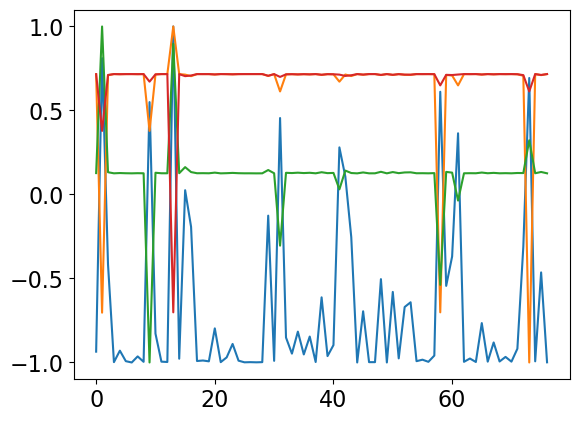

In [709]:
#time variation of mode 0 with samples
plt.plot(xtrain[:,0,0])
plt.plot(xtrain[:,0,1])
plt.plot(xtrain[:,0,2])
#plt.plot(xtrain[:,0,3])
plt.plot(ytrain[:,1])



In [739]:
def create_model1(dict_para):
    # We optimize the numbers of layers, their units and weight decay parameter.

    n_layers =study.best_params['n_layers']
    
    #weight_decay = trial.suggest_float("weight_decay",  2e-6, 1e-1, log=True)
    #lr = trial.suggest_float("lr", 0.05, 0.06, log=True)
      
    #momentum = trial.suggest_float("momentum", 0.8, 1.0)
    model = Sequential()

    for i in range(n_layers):
        
        dropout = study.best_params['dropout_l0'] #trial.suggest_float("dropout_l{}".format(i), 0.21, 0.42)

        num_hidden = study.best_params['n_units_l0'] #trial.suggest_int("n_units_l{}".format(i), 20, 150, log=True)
        
        if i < max(range(n_layers)):
            rs = True
        else:
            rs = False # final hidden 

        Q=xtrain.shape[2]

        model.add(LSTM(num_hidden, input_shape=(xtrain.shape[1:]), activation='tanh',return_sequences=rs))

        model.add(Dropout(rate=dropout)) 

    model.add(Dense(Q, activation='linear')) 
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
    
    es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
    mc = keras.callbacks.ModelCheckpoint(filepath=os.getcwd(),filename='{epoch}-{val_loss:.5f}.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
    reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=5, min_lr=0.001)
    callbacks=[es,mc,reduce_lr]
    epochs=1000
    batch_size=32   
    # run the model
    history = model.fit(xtrain, ytrain, epochs=epochs, batch_size=batch_size,validation_split=0.2) #callbacks=[es,mc,reduce_lr]

    # evaluate the model
    scores = model.evaluate(xtrain, ytrain, verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    return model,loss,val_loss


In [712]:
model,loss,val_loss=create_model1(dict_para)

Epoch 1/1000
2/2 [==============================] - 5s 977ms/step - loss: 0.4355 - mse: 0.4355 - val_loss: 0.4221 - val_mse: 0.4221
Epoch 2/1000
2/2 [==============================] - 0s 75ms/step - loss: 0.4079 - mse: 0.4079 - val_loss: 0.3889 - val_mse: 0.3889
Epoch 3/1000
2/2 [==============================] - 0s 91ms/step - loss: 0.3771 - mse: 0.3771 - val_loss: 0.3570 - val_mse: 0.3570
Epoch 4/1000
2/2 [==============================] - 0s 85ms/step - loss: 0.3444 - mse: 0.3444 - val_loss: 0.3255 - val_mse: 0.3255
Epoch 5/1000
2/2 [==============================] - 0s 102ms/step - loss: 0.3155 - mse: 0.3155 - val_loss: 0.2935 - val_mse: 0.2935
Epoch 6/1000
2/2 [==============================] - 0s 73ms/step - loss: 0.2827 - mse: 0.2827 - val_loss: 0.2606 - val_mse: 0.2606
Epoch 7/1000
2/2 [==============================] - 0s 94ms/step - loss: 0.2541 - mse: 0.2541 - val_loss: 0.2264 - val_mse: 0.2264
Epoch 8/1000
2/2 [==============================] - 0s 95ms/step - loss: 0.2130 -

In [713]:
model.save("best_model.h5")
reconstructed_model = load_model("best_model.h5")
reconstructed_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 3, 60)             15360     
                                                                 
 dropout_2 (Dropout)         (None, 3, 60)             0         
                                                                 
 lstm_3 (LSTM)               (None, 60)                29040     
                                                                 
 dropout_3 (Dropout)         (None, 60)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 183       
                                                                 
Total params: 44,583
Trainable params: 44,583
Non-trainable params: 0
_________________________________________________________________


In [717]:
ytrain_predicted_scaled=model.predict(xtrain) #Unscaled.
ytrain_predicted = sc.inverse_transform(ytrain_predicted_scaled)

3/3 [==============================] - 0s 7ms/step


In [716]:
# True Vs Projected True Vs POD+LSTM prediction.
yvalid_predicted_scaled=reconstructed_model.predict(xvalid)
yvalid_predicted = sc.inverse_transform(yvalid_predicted_scaled) #Unscaled.


1/1 [==============================] - 0s 59ms/step


In [718]:
a_true_4_T=sc.inverse_transform(a_true_4_T)


In [620]:
np.arange(yvalid_predicted.shape[0])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [550]:
# About LSTM POD Methodology. Temperature filed resconstructed using POD LSTM reduced order model
# In LSTM, you can either: (a) Learn to predict N future steps by training it for that. The sahpe is num_samplesxlookbackxfeatures. The output is num_samples x num_future_steps x num_features. 
# Thus for a given sample : use Input L lookbacks with feature M to Get  output N steps in future with M+1 features.
# Train LSTM for predicting  1 step in future , and use rolling LSTM (See snippet at end). This was done in HAM airofoil work. 
#  Where input field to LSTM is updated after one time step using LSTM prediction from past iteration. and the predictions continue over time loop til end.
# LSTM architecture can be flexible with One to One, One to Many, Many to Many architectures.

Plots folder already exists


/home/mandart/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


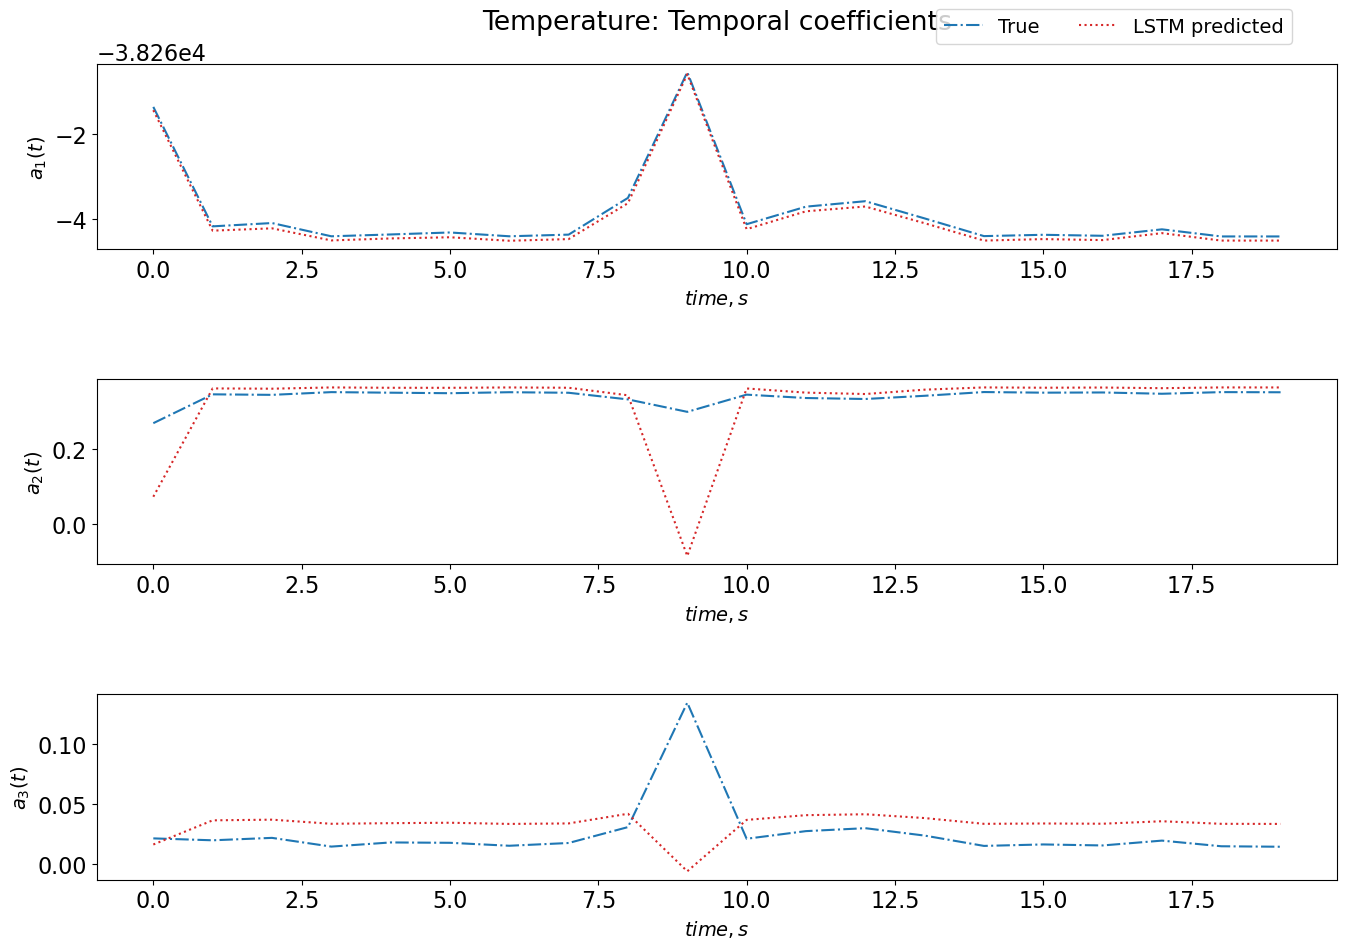

In [721]:
if os.path.isdir("./Plots1"):
    print('Plots folder already exists')
else: 
    print('Creating plots folder')
    os.makedirs("./Plots1")#plot comparisons
t= np.arange(yvalid_predicted.shape[0])    
nr=yvalid_predicted.shape[1]    
fig, ax = plt.subplots(nrows=nr,ncols=1, figsize=(16,12),facecolor=(1, 1, 1)) #nr
ax = ax.flat
#fig.suptitle('Velocity: Temporal coefficients', fontsize=12)
ax[0].set_title('Temperature: Temporal coefficients', pad=25)
for k in range(nr):#nr
    ax[k].plot(t,a_true_4_T[timeindex_test_label,k],label=r'True', color = 'C0',linestyle='-.')
##       ax[k].plot(t,aUROM[:,k,p], label=r'UROM',linestyle='-.', color = 'C1')
#     ax[k].plot(t,aGPtest[:,k], label=r'GROM',linestyle='--', color = 'C2')
##       ax[k].plot(t,aGP4[:,k,p], label=r'GROM('+str(R)+')',linestyle=':', color = 'C3')
    ax[k].plot(t,yvalid_predicted[:,k], label=r'LSTM predicted',linestyle=':', color = 'C3')
    ax[k].set_xlabel(r'$time,s$',fontsize=14)
    ax[k].set_ylabel(r'$a_{'+str(k+1) +'}(t)$',fontsize=14)

ax[0].legend(loc="center",bbox_to_anchor=(0.82,1.2),ncol =2,fontsize=14) #
fig.subplots_adjust(bottom=0.2,hspace=0.7, wspace=0.35)
plt.savefig('./Plots1/Temperature_Greenhouse_newwa_Re' + str(nr) + 'Test' + '.png',dpi = 500, bbox_inches = 'tight')
plt.savefig('./Plots1/Temperature_Greenhouse_newwa_Re' + str(nr) + 'Test' + '.pdf',dpi = 500, bbox_inches = 'tight')
fig.show()

Plots folder already exists


/home/mandart/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


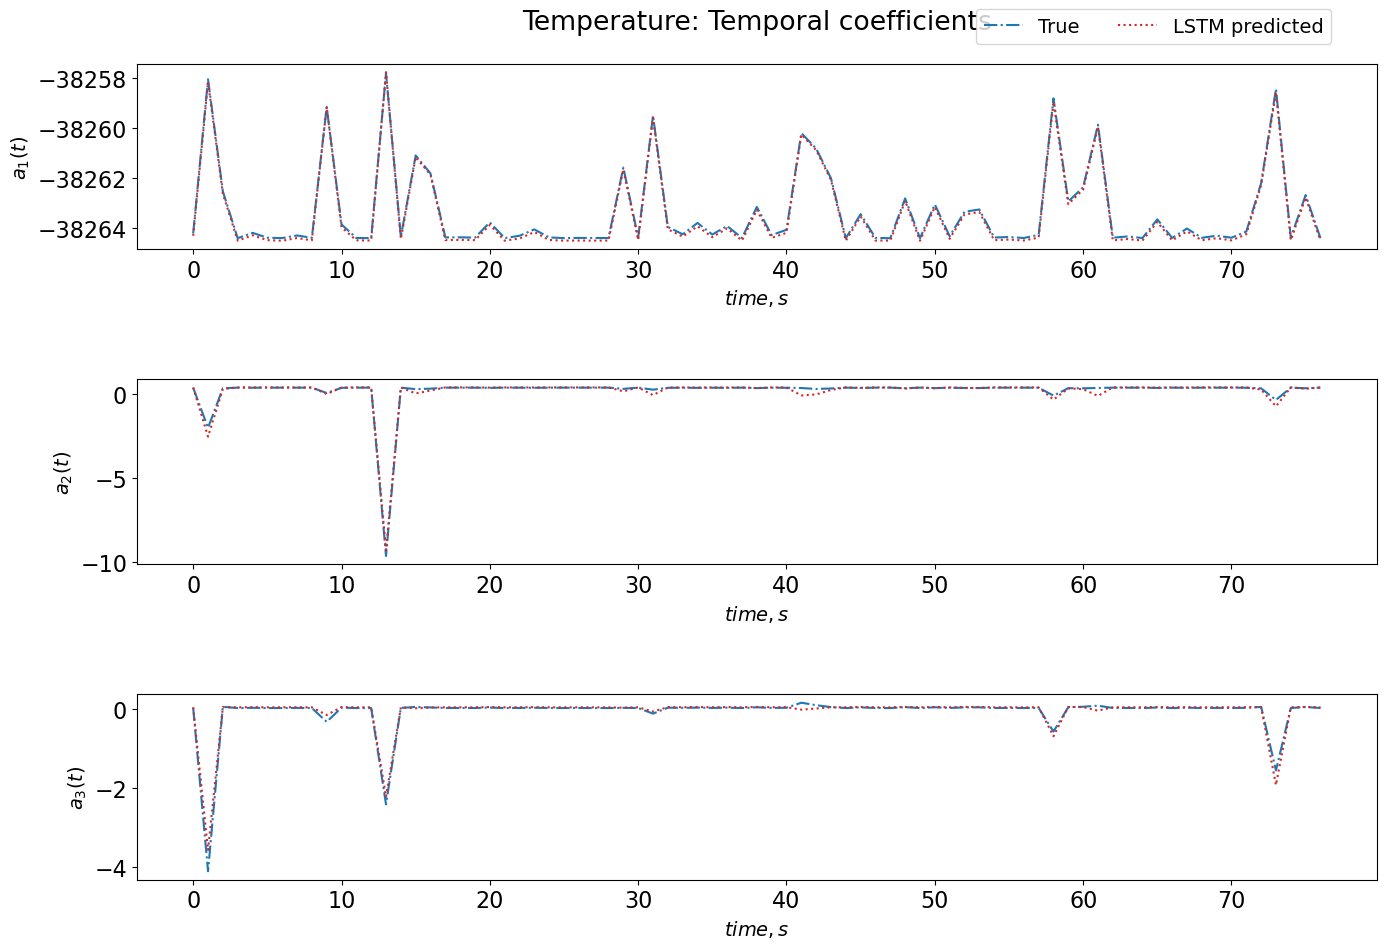

In [722]:
if os.path.isdir("./Plots1"):
    print('Plots folder already exists')
else: 
    print('Creating plots folder')
    os.makedirs("./Plots1")#plot comparisons
t= np.arange(ytrain_predicted.shape[0])    
nr=ytrain_predicted.shape[1]    
fig, ax = plt.subplots(nrows=nr,ncols=1, figsize=(16,12),facecolor=(1, 1, 1)) #nr
ax = ax.flat
#fig.suptitle('Velocity: Temporal coefficients', fontsize=12)
ax[0].set_title('Temperature: Temporal coefficients', pad=25)
for k in range(nr):#nr
    ax[k].plot(t,a_true_4_T[timeindex_train_label,k],label=r'True', color = 'C0',linestyle='-.')
##       ax[k].plot(t,aUROM[:,k,p], label=r'UROM',linestyle='-.', color = 'C1')
#     ax[k].plot(t,aGPtest[:,k], label=r'GROM',linestyle='--', color = 'C2')
##       ax[k].plot(t,aGP4[:,k,p], label=r'GROM('+str(R)+')',linestyle=':', color = 'C3')
    ax[k].plot(t,ytrain_predicted[:,k], label=r'LSTM predicted',linestyle=':', color = 'C3')
    ax[k].set_xlabel(r'$time,s$',fontsize=14)
    ax[k].set_ylabel(r'$a_{'+str(k+1) +'}(t)$',fontsize=14)

ax[0].legend(loc="center",bbox_to_anchor=(0.82,1.2),ncol =2,fontsize=14) #
fig.subplots_adjust(bottom=0.2,hspace=0.7, wspace=0.35)
plt.savefig('./Plots1/Greenhouse_train_newwa_Re' + str(nr) + 'Train' + '.png',dpi = 500, bbox_inches = 'tight')
fig.show()

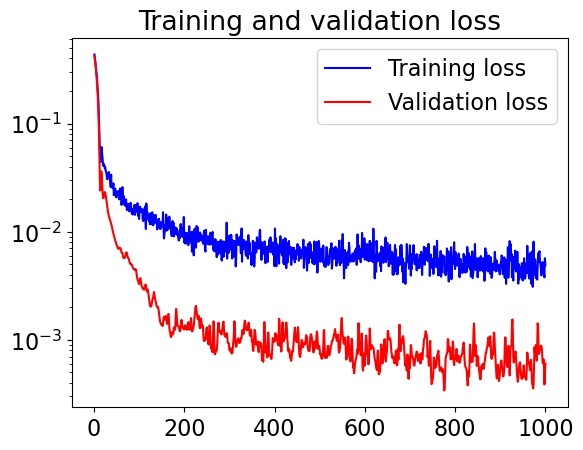

In [723]:
#code to add
plt.figure()
epochs = range(1, len(loss) + 1)
plt.semilogy(epochs, loss, 'b', label='Training loss')
plt.semilogy(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
filename = './Plots1/loss3_temperature.png'
plt.savefig(filename, dpi = 200)
plt.show()

# RECONSTRUCT FLOW FIELD FOR VELOCITY

In [731]:

#obtain projected reconstruction using Phi_U and a_true[timeindex]
Ureconstructed_temp_true=PODrec(a_true_4_T[timeindex_test_label],Phi_T)

#obtain predicted reconstruction using Phi_U and a_predicted with  figure label indicating timeindex
Ureconstructed_temp_LSTM=PODrec(yvalid_predicted,Phi_T)

In [732]:
Ureconstructed_temp_true.shape

(16704, 20)

In [733]:
Ureconstructed_temp_LSTM.shape

(16704, 20)

In [734]:
error_temp_test_LSTM=Ureconstructed_temp_LSTM-Ureconstructed_temp_true

In [735]:
for i in np.arange(0,error_test_LSTM.shape[1]-2,5):
    print(i)
    grid_modes8.cell_data["error_LSTM_test"+str(i)]=error_temp_test_LSTM[:,i]
    grid_modes8.cell_data["LSTMreconstructed_vel_test"+str(i)]=Ureconstructed_temp_LSTM[:,i]
    grid_modes8.cell_data["original_vel_test"+str(i)]=Ureconstructed_temp_true[:,i]
grid_modes8.cell_data_to_point_data()    

0
5
10
15


UnstructuredGrid (0x7f907975b210)
  N Cells:	16704
  N Points:	18750
  X Bounds:	0.000e+00, 4.800e-01
  Y Bounds:	0.000e+00, 4.800e-01
  Z Bounds:	0.000e+00, 5.800e-01
  N Arrays:	27

In [736]:
grid_modes8.save('reconstructed_lstm_temperature.vtu')

In [2]:
# Snippets from code below on different ways of using LSTM. The source of this code are in reference below.

trials = study.best_trial
print("Best Score: ", trials.value)
print("Best Params: ")
for key, value in trials.params.items():
    print("  {}: {}".format(key, value))

In [ ]:
#Convert into LSTM format with Input: num_samples x times at time t,t-1,t-2 x feature , and Output: num_samples (value at time t) 

In [3]:
# For one file. Loading and checking. 